在这个版本中，期望值和方差的计算严格遵循离散概率分布的公式:
- 期望值： $E[X]=\sum_i x_i \cdot p\left(x_i\right)$
- 方差: $\operatorname{Var}(X)=\sum_i\left(x_i^2 \cdot p\left(x_i\right)\right)-(E[X])^2$

希望这次能够正确地使用概率分布来计算这些值。

In [1]:
import numpy as np
from scipy.linalg import expm

# Pauli 矩阵
I = np.eye(2)
X = np.array([[0, 1], 
              [1, 0]])
Y = np.array([[0, -1j], 
              [1j, 0]])
Z = np.array([[1, 0], 
              [0, -1]])

def pauli_word(word):
    """根据给定的 Pauli word 字符串返回对应的矩阵"""
    matrices = {'I': I, 'X': X, 'Y': Y, 'Z': Z}
    result = matrices[word[0]]
    for char in word[1:]:
        result = np.kron(result, matrices[char])
    return result

def U(x, H):
    """计算 U(x) = exp(iHx)"""
    return expm(1j * x * H)

def quantum_measurement(M, psi):
    # 计算M的特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(M)
    
    # 计算投影算子
    projectors = [np.outer(v, v.conj()) for v in eigenvectors.T]

    # 检查投影算子的和是否为单位矩阵
    # print('Sum of projectors is equal to identity matrix: ', np.allclose(sum(P for P in projectors), np.eye(len(psi))))

    # 计算测量结果的概率分布
    probabilities = [np.real(np.dot(psi.conj().T, np.dot(P, psi))[0, 0]) for P in projectors]
    
    # 使用离散概率分布公式计算期望值
    N = len(eigenvalues)
    # expectation_defn = sum(eigenvalues[i] * probabilities[i] for i in range(N))
    # print('expectation_defn: ', expectation_defn)
    expectation_M = np.real(np.dot(psi.conj().T, np.dot(M, psi)))[0, 0]
    # print('expectation_M: ', expectation_M)
    # print(f'expectation_defn equals expectation_M: {np.isclose(expectation_defn, expectation_M)}')

    # 使用离散概率分布公式计算方差
    # variance_defn1 = sum((eigenvalues[i] - expectation_defn)** 2 * probabilities[i] for i in range(N))  
    # variance_defn2 = sum((eigenvalues[i]** 2) * probabilities[i] for i in range(N)) - expectation_defn**2
    variance_M = np.real(np.dot(psi.conj().T, np.dot(M @ M, psi)))[0, 0] - expectation_M**2
    # print('variance_defn1: ', variance_defn1)
    # print('variance_defn2: ', variance_defn2)
    # print('variance_M: ', variance_M)
    # print(f'variance_defn1 equals variance_defn2: {np.isclose(variance_defn1, variance_defn2)}')
    # print(f'variance_defn2 equals variance_M: {np.isclose(variance_defn2, variance_M)}')
    # print('variance_defn1 equals variance_M: ', np.isclose(variance_defn1, variance_M))

    return eigenvalues, probabilities, expectation_M, variance_M

# bit number
n=2

pauli_word_str = 'XY'  # Pauli word
# 生成 Pauli word 对应的矩阵
H = pauli_word(pauli_word_str)
# H = np.random.rand(2**n, 2**n) #+ 1j * np.random.rand(2**n, 2**n)
# H = (H + H.conj().T) / 2

# 初始态 |0⟩

# psi_0 = np.zeros((2**n, 1))
# psi_0[0] = 1

# psi_0 = np.ones((2**n, 1)) / np.sqrt(2**n)

# 随机初始态 |0⟩
psi_0 = np.random.rand(2**n, 1) 
psi_0 = psi_0 / np.linalg.norm(psi_0)

# # 创建一个 4x4 Hermitian 矩阵 M 并扩展到 8x8 矩阵
# M = np.array([[2, 1-1j, 0, 0], 
#               [1+1j, 2, 0, 0], 
#               [0, 0, 3, 1], 
#               [0, 0, 1, 3]])
# M = np.zeros((8, 8), dtype=complex)
# M[:4, :4] = M  # 扩展矩阵到 8x8

# 随机可观测量 M
M = np.random.rand(2**n, 2**n) + 1j * np.random.rand(2**n, 2**n)
M = (M + M.conj().T) / 2  # 对称化使其为 Hermitian


In [2]:
# 设置参数
x = np.random.rand() * 2 * np.pi  # 随机生成一个 0 到 2π 之间的演化参数
# x = np.pi/ 2  # 设置演化参数为 π/2
# x=2.821069090319835

# 初始态 |0⟩

# psi_0 = np.zeros((2**n, 1))
# psi_0[0] = 1

# psi_0 = np.ones((2**n, 1)) / np.sqrt(2**n)

# 随机初始态 |0⟩
psi_0 = np.random.rand(2**n, 1) 
psi_0 = psi_0 / np.linalg.norm(psi_0)

# 生成量子态 |ψ⟩ = U(x)|0⟩
psi = np.dot(U(x, H), psi_0)

# 进行量子测量
eigenvalues, probabilities, expectation, variance = quantum_measurement(M, psi)

# 打印结果
print(f"\nPauli word H = {pauli_word_str} = \n{H}")

# print("\n特征值:")
# print(eigenvalues)

print(f"演化参数 x = {x}")

# print("\n量子态 |ψ⟩ = U(x)|0⟩:")
# print(psi)

print("\n测量结果的概率分布:")
print(probabilities)

# print("\n期望值:")
# print(expectation)

# print("\n方差:")
# print(variance)



Pauli word H = XY = 
[[0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]
演化参数 x = 3.470508347211598

测量结果的概率分布:
[0.05519782574838317, 0.12415004939350033, 0.3414584080018705, 0.4791937168562469]


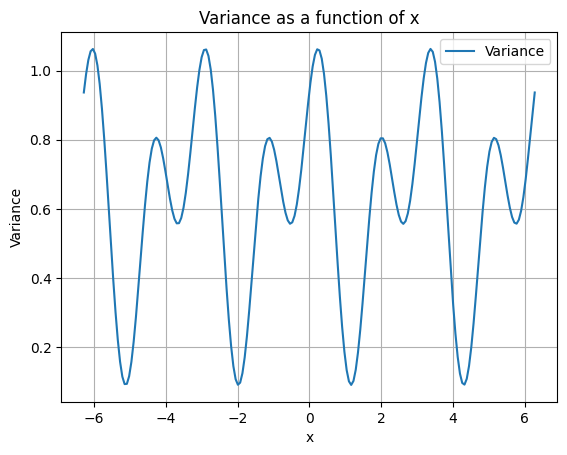

In [3]:
import matplotlib.pyplot as plt
# 计算方差随 x 变化的图像
x_values = np.linspace(- 2 * np.pi, 2 * np.pi, 200)
variance_values = []

for x in x_values:
    # 生成量子态 |ψ⟩ = U(x)|psi_0⟩
    psi = np.dot(U(x, H), psi_0)
    # psi = U(x, H) @ psi_0
    # 计算方差
    _, _, _, variance = quantum_measurement(M, psi)
    variance_values.append(variance)

# 绘制方差随 x 变化的曲线
plt.plot(x_values, variance_values, label='Variance')
plt.xlabel('x')
plt.ylabel('Variance')
plt.title('Variance as a function of x')
plt.legend()
plt.grid(True)
plt.show()

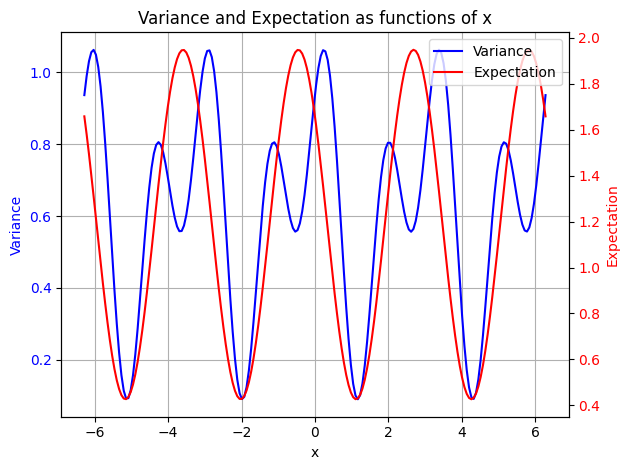

In [4]:
# 计算方差和期望值随 x 变化的图像
x_values = np.linspace(- 2 * np.pi, 2 * np.pi, 200)
variance_values = []
expectation_values = []

fix_bar_x = 0
for x in x_values:
    # 生成量子态 |ψ⟩ = U(x)|psi_0⟩
    psi = np.dot(U(fix_bar_x + x, H), psi_0)
    # 计算期望值和方差
    _, _, expectation, variance = quantum_measurement(M, psi)
    expectation_values.append(expectation)
    variance_values.append(variance)

# 绘制方差和期望值随 x 变化的曲线
fig, ax1 = plt.subplots()

# 绘制方差
ax1.plot(x_values, variance_values, 'b-', label='Variance')
ax1.set_xlabel('x')
ax1.set_ylabel('Variance', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# 使用第二个y轴绘制期望值
ax2 = ax1.twinx()
ax2.plot(x_values, expectation_values, 'r-', label='Expectation')
ax2.set_ylabel('Expectation', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加标题
plt.title('Variance and Expectation as functions of x')
fig.tight_layout()

# 显示图例
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()